In [1]:
# import pandas as pd

# # Load the datasets
# demand_actual = pd.read_csv('demand_actual.csv')
# demand_forecast = pd.read_csv('demand_forecast.csv')
# interconnections = pd.read_csv('interconnections.csv')
# pricedat = pd.read_csv('pricedat.csv')
# prices = pd.read_csv('prices.csv')
# rooftop_solar = pd.read_csv('rooftop_solar.csv')

In [2]:
# demand_actual

In [3]:
# demand_forecast

In [4]:
# # Filter for NSW1 region in each dataset
# nsw_demand_actual = demand_actual[demand_actual['REGIONID'] == 'NSW1'].copy()
# nsw_demand_forecast = demand_forecast[demand_forecast['REGIONID'] == 'NSW1'].copy()
# nsw_solar = rooftop_solar[rooftop_solar['REGIONID'] == 'NSW1'].copy()
# nsw_prices = prices[prices['REGIONID'] == 'NSW1'].copy()
# nsw_pricedat = pricedat[pricedat['REGIONID'] == 'NSW1'].copy()


In [5]:
# nsw_demand_actual = nsw_demand_actual.drop(columns = ["REGIONID","Unnamed: 0"])
# nsw_demand_actual = nsw_demand_actual.drop(columns = ["LASTCHANGED"])
# nsw_demand_actual

In [6]:
# nsw_demand_forecast = nsw_demand_forecast.drop(columns = ["REGIONID","Unnamed: 0"])
# nsw_demand_forecast = nsw_demand_forecast.drop(columns = ["LASTCHANGED"])
# nsw_demand_forecast = nsw_demand_forecast.drop(columns = ["LOAD_DATE"])
# nsw_demand_forecast

In [7]:
# nsw_solar = nsw_solar.drop(columns = ["REGIONID","Unnamed: 0","LASTCHANGED","QI"])
# nsw_solar

In [8]:
# nsw_prices= nsw_prices.drop(columns=["REGIONID","Unnamed: 0"])
# nsw_prices

In [9]:
# nsw_pricedat = nsw_pricedat.drop(columns = ["Unnamed: 0","REGIONID","LASTCHANGED","EEP","INVALIDFLAG","RUNNO"])
# nsw_pricedat = nsw_pricedat.drop(nsw_pricedat.columns[4:24],axis =1)
# # nsw_pricedat = nsw_pricedat["date_time","RRP","ROP","RAISE6SECRRP","PERIODID"]
# no = ["date_time","RRP","ROP","RAISE6SECRRP","PERIODID"]
# nsw_pricedat = nsw_pricedat[no]
# nsw_pricedat

In [10]:
# nsw_demand_actual.to_csv('NSW/nsw_demand_actual.csv', index = False)
# nsw_demand_forecast.to_csv('NSW/nsw_demand_forecast.csv', index = False)
# nsw_solar.to_csv('NSW/nsw_solar.csv', index = False)
# nsw_prices.to_csv('NSW/nsw_prices.csv', index = False)
# nsw_pricedat.to_csv('NSW/nsw_pricedat.csv', index = False)

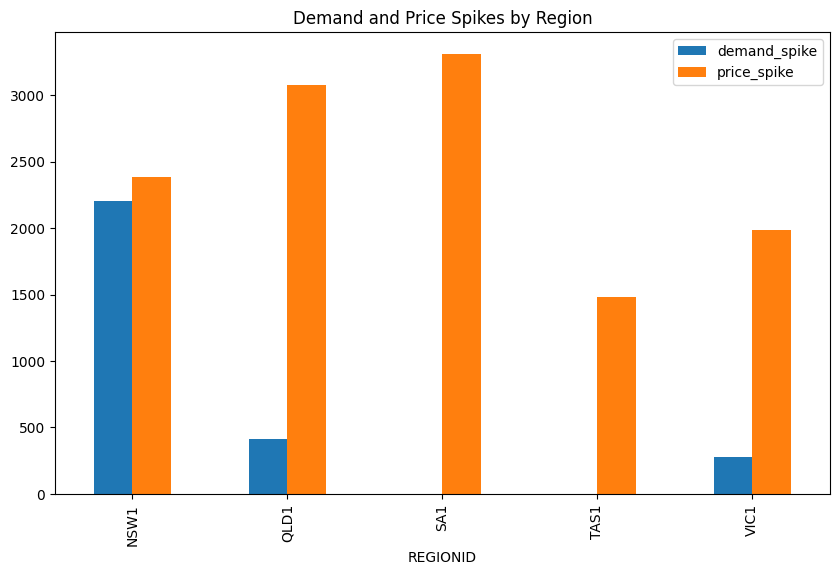

          demand_spike  price_spike
REGIONID                           
NSW1              2202         2381
QLD1               410         3079
SA1                  1         3309
TAS1                 0         1485
VIC1               277         1987


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
demand_actual = pd.read_csv('demand_actual.csv')
prices = pd.read_csv('prices.csv')

# Convert date_time columns to datetime format
demand_actual['date_time'] = pd.to_datetime(demand_actual['date_time'])
prices['date_time'] = pd.to_datetime(prices['date_time'])

# Merge demand and price data on date_time and REGIONID
merged_data = pd.merge(demand_actual, prices, on=['date_time', 'REGIONID'], how='inner')

# Define a threshold for spike detection (this can be adjusted based on data)
demand_threshold = 500  # A sudden increase of 500 units in demand could be considered a spike
price_threshold = 100  # A sudden increase of 100 units in RRP could be a spike

# Calculate the demand and price differences to detect spikes
merged_data['demand_diff'] = merged_data.groupby('REGIONID')['OPERATIONAL_DEMAND'].diff().fillna(0)
merged_data['price_diff'] = merged_data.groupby('REGIONID')['RRP'].diff().fillna(0)

# Identify spikes based on the thresholds
merged_data['demand_spike'] = merged_data['demand_diff'].abs() > demand_threshold
merged_data['price_spike'] = merged_data['price_diff'].abs() > price_threshold

# Count the number of spikes per region
spike_counts = merged_data.groupby('REGIONID')[['demand_spike', 'price_spike']].sum()

# Plotting spikes for visualization
spike_counts.plot(kind='bar', figsize=(10, 6), title="Demand and Price Spikes by Region")
plt.show()

# Output spike counts to check which region experiences the most spikes
print(spike_counts)


In [2]:
import pandas as pd
nsw_demand_actual = pd.read_csv("NSW/nsw_demand_actual.csv")
nsw_demand_forecast = pd.read_csv("NSW/nsw_demand_forecast.csv")
nsw_solar = pd.read_csv("NSW/nsw_solar.csv")
nsw_prices = pd.read_csv("NSW/nsw_prices.csv")
nsw_pricedat = pd.read_csv("NSW/nsw_pricedat.csv")

In [3]:
nsw_solar = nsw_solar.rename(columns={'INTERVAL_DATETIME': 'date_time'})
nsw_solar

,date_time,TYPE,POWER
0,2022-01-01 00:00:00,MEASUREMENT,0.000
1,2022-01-01 00:00:00,SATELLITE,0.000
2,2022-01-01 00:30:00,MEASUREMENT,0.000
3,2022-01-01 00:30:00,SATELLITE,0.000
4,2022-01-01 01:00:00,MEASUREMENT,0.000
...,...,...,...
89746,2024-07-24 13:30:00,SATELLITE,2735.375
89747,2024-07-24 14:00:00,MEASUREMENT,2770.400
89748,2024-07-24 14:00:00,SATELLITE,2467.828
89749,2024-07-24 14:30:00,MEASUREMENT,2445.089


In [4]:
nsw_demand_cmd = pd.merge(nsw_demand_actual, nsw_demand_forecast, on=['date_time'], how = 'inner')
nsw_demand_cmd

,date_time,OPERATIONAL_DEMAND,OPERATIONAL_DEMAND_POE10,OPERATIONAL_DEMAND_POE50,OPERATIONAL_DEMAND_POE90
0,2022-01-01 00:00:00,7329,7451.0,7336,7221.0
1,2022-01-01 00:30:00,7145,7288.0,7151,7013.0
2,2022-01-01 01:00:00,6891,7032.0,6899,6766.0
3,2022-01-01 01:30:00,6578,6711.0,6585,6458.0
4,2022-01-01 02:00:00,6306,6450.0,6328,6206.0
...,...,...,...,...,...
44906,2024-07-24 13:00:00,6227,6437.0,6338,6239.0
44907,2024-07-24 13:30:00,6233,6324.0,6227,6130.0
44908,2024-07-24 14:00:00,6416,6435.0,6337,6238.0
44909,2024-07-24 14:30:00,6625,6753.0,6649,6545.0


In [5]:
nsw_price_cmd = pd.merge(nsw_pricedat, nsw_prices, on=['date_time','RRP'], how = 'inner')
nsw_price_cmd

,date_time,RRP,ROP,RAISE6SECRRP,PERIODID
0,2022-01-01 00:00:00,124.77,124.77,20.45,288
1,2022-01-01 00:05:00,124.86,124.86,5.00,1
2,2022-01-01 00:10:00,126.02,126.02,5.00,2
3,2022-01-01 00:15:00,124.93,124.93,5.00,3
4,2022-01-01 00:20:00,113.54,113.54,5.00,4
...,...,...,...,...,...
269447,2024-07-24 14:50:00,39.66,39.66,0.33,178
269448,2024-07-24 14:55:00,40.07,40.07,0.38,179
269449,2024-07-24 15:00:00,51.70,51.70,0.38,180
269450,2024-07-24 15:05:00,0.00,0.00,0.38,181


In [8]:
# # merged_data = pd.merge(nsw_demand_cmd, nsw_price_cmd, on=['date_time'], how='inner')
# merged_all = pd.merge(nsw_price_cmd,nsw_demand_cmd, on=['date_time'], how='inner')

In [9]:
# merged_all.to_csv('NSW/nsw_merged_all.csv', index = False)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, Dropout
from math import sqrt
from tensorflow.keras.callbacks import EarlyStopping

# Step 1: Load the dataset
data = pd.read_csv('NSW/nsw_merged_all.csv')

# Convert 'date_time' to datetime format
data['date_time'] = pd.to_datetime(data['date_time'])
print(data)

                date_time         TYPE     POWER  OPERATIONAL_DEMAND  \
0     2022-01-01 00:00:00  MEASUREMENT     0.000                7329   
1     2022-01-01 00:00:00    SATELLITE     0.000                7329   
2     2022-01-01 00:30:00  MEASUREMENT     0.000                7145   
3     2022-01-01 00:30:00    SATELLITE     0.000                7145   
4     2022-01-01 01:00:00  MEASUREMENT     0.000                6891   
...                   ...          ...       ...                 ...   
89742 2024-07-24 13:30:00    SATELLITE  2735.375                6233   
89743 2024-07-24 14:00:00  MEASUREMENT  2770.400                6416   
89744 2024-07-24 14:00:00    SATELLITE  2467.828                6416   
89745 2024-07-24 14:30:00  MEASUREMENT  2445.089                6625   
89746 2024-07-24 14:30:00    SATELLITE  2141.324                6625   

       OPERATIONAL_DEMAND_POE10  OPERATIONAL_DEMAND_POE50  \
0                        7451.0                      7336   
1            

In [14]:
# Step 2: Select relevant columns (we'll use 'OPERATIONAL_DEMAND', 'POWER', and 'RRP')
features = ['OPERATIONAL_DEMAND', 'POWER', 'RRP']  # Adjust based on the dataset structure
data = data[features].fillna(0)  # Fill NaNs with 0 if needed

# Step 3: Normalize the data using MinMaxScaler (scale all values between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Step 4: Create time-series sequences for LSTM + RNN model
def create_dataset(dataset, look_back=60):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), :])  # Use all features for X
        y.append(dataset[i + look_back, 0])  # Predict only 'OPERATIONAL_DEMAND'
    return np.array(X), np.array(y)

look_back = 100  # Define how many past time steps to look at
X, y = create_dataset(scaled_data, look_back)

# Step 5: Split into training and testing sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

2024-10-04 13:55:57.583052: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-10-04 13:55:57.583135: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2024-10-04 13:55:57.583151: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2024-10-04 13:55:57.583218: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-04 13:55:57.583242: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/opt/anaconda3/envs/ml-env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequen

Epoch 1/20


2024-10-04 13:55:58.239687: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


2242/2242 ━━━━━━━━━━━━━━━━━━━━ 45s 19ms/step - loss: 0.0021 - val_loss: 2.7722e-04
Epoch 2/20
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 43s 19ms/step - loss: 1.5394e-04 - val_loss: 2.6321e-04
Epoch 3/20
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - loss: 1.1049e-04 - val_loss: 8.0062e-05
Epoch 4/20
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - loss: 7.4455e-05 - val_loss: 8.9196e-05
Epoch 5/20
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 43s 19ms/step - loss: 7.0969e-05 - val_loss: 8.8096e-05
Epoch 6/20
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - loss: 6.8847e-05 - val_loss: 1.5444e-04
561/561 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
RMSE: 88.79730066047878


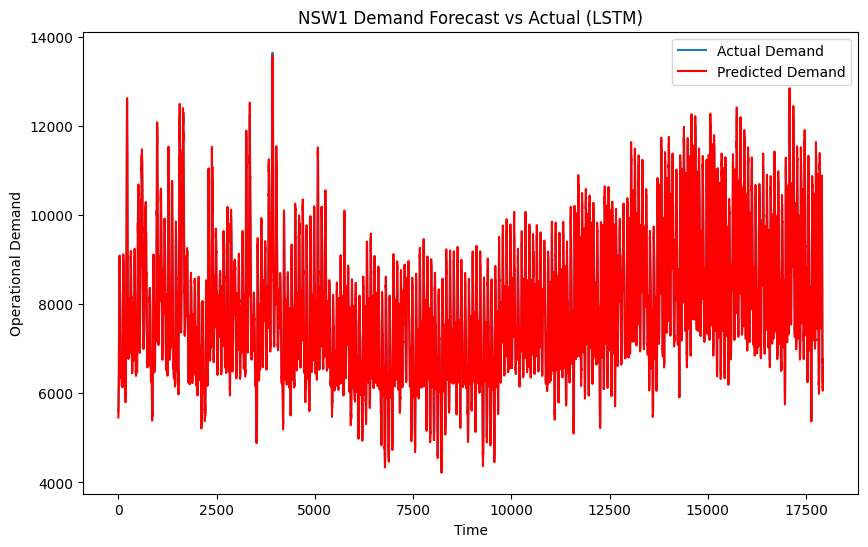

In [15]:
# Step 6: Build the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dense(units=50))
model.add(Dense(units=25))
model.add(Dense(units=1))  # Output layer for demand prediction

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Add early stopping to model.fit
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Step 8: Make predictions on the test set
predictions = model.predict(X_test)

# Inverse transform the predictions back to original values
predictions = scaler.inverse_transform(np.concatenate([predictions, np.zeros((predictions.shape[0], 2))], axis=1))[:,0]
y_test_actual = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 2))], axis=1))[:,0]

# Step 9: Calculate RMSE
rmse = sqrt(mean_squared_error(y_test_actual, predictions))
print(f'RMSE: {rmse}')

# Step 10: Plot the predictions vs actual values
plt.figure(figsize=(10,6))
plt.plot(y_test_actual, label='Actual Demand')
plt.plot(predictions, label='Predicted Demand', color='red')
plt.title('NSW1 Demand Forecast vs Actual (LSTM)')
plt.xlabel('Time')
plt.ylabel('Operational Demand')
plt.legend()
plt.show()


Training LSTM model for Summer...
Epoch 1/50


/opt/anaconda3/envs/ml-env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


574/574 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - loss: 0.0049
Epoch 2/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 2.4521e-04
Epoch 3/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 1.5501e-04
Epoch 4/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 1.3959e-04
Epoch 5/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 1.2568e-04
Epoch 6/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 1.1189e-04
Epoch 7/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 1.1566e-04
Epoch 8/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 1.0872e-04
Epoch 9/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - loss: 1.0411e-04
Epoch 10/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 1.0317e-04
Epoch 11/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 306s 534ms/step - loss: 9.6955e-05
Epoch 12/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 386s 673ms/step - loss: 9.6150e-05
Epoch 13/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 391s 682ms/step - loss: 9.1352e-05
Epoch 14/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 687s 1s/step - 

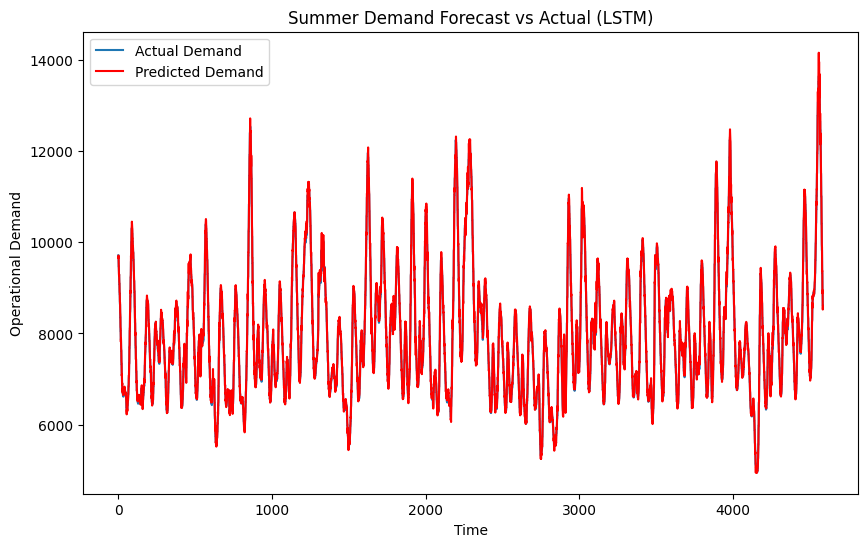

Training LSTM model for Autumn...
Epoch 1/50


/opt/anaconda3/envs/ml-env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


661/661 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - loss: 0.0074
Epoch 2/50
661/661 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - loss: 2.9236e-04
Epoch 3/50
661/661 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - loss: 1.8020e-04
Epoch 4/50
661/661 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - loss: 1.5378e-04
Epoch 5/50
661/661 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - loss: 1.4600e-04
Epoch 6/50
661/661 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - loss: 1.3732e-04
Epoch 7/50
661/661 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - loss: 1.4394e-04
Epoch 8/50
661/661 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - loss: 1.3334e-04
Epoch 9/50
661/661 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - loss: 1.3273e-04
Epoch 10/50
661/661 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - loss: 1.2508e-04
Epoch 11/50
661/661 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - loss: 1.2384e-04
Epoch 12/50
661/661 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - loss: 1.2419e-04
Epoch 13/50
661/661 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - loss: 1.2657e-04
Epoch 14/50
661/661 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - loss:

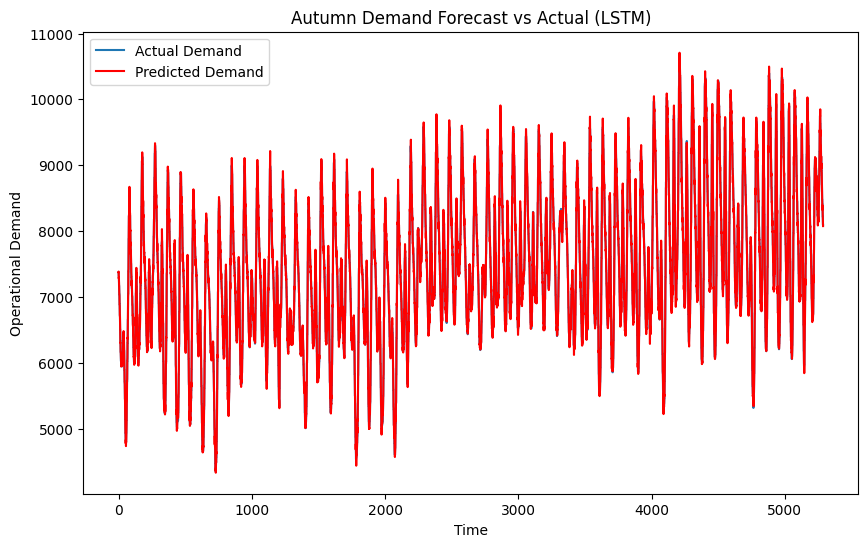

Training LSTM model for Winter...
Epoch 1/50


/opt/anaconda3/envs/ml-env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


569/569 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - loss: 0.0113
Epoch 2/50
569/569 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 4.8132e-04
Epoch 3/50
569/569 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - loss: 3.3887e-04
Epoch 4/50
569/569 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 3.4018e-04
Epoch 5/50
569/569 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 2.8414e-04
Epoch 6/50
569/569 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 2.9754e-04
Epoch 7/50
569/569 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 2.8143e-04
Epoch 8/50
569/569 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 2.6662e-04
Epoch 9/50
569/569 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - loss: 3.0031e-04
Epoch 10/50
569/569 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 2.4512e-04
Epoch 11/50
569/569 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - loss: 2.3441e-04
Epoch 12/50
569/569 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 1.6106e-04
Epoch 13/50
569/569 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - loss: 1.2929e-04
Epoch 14/50
569/569 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss:

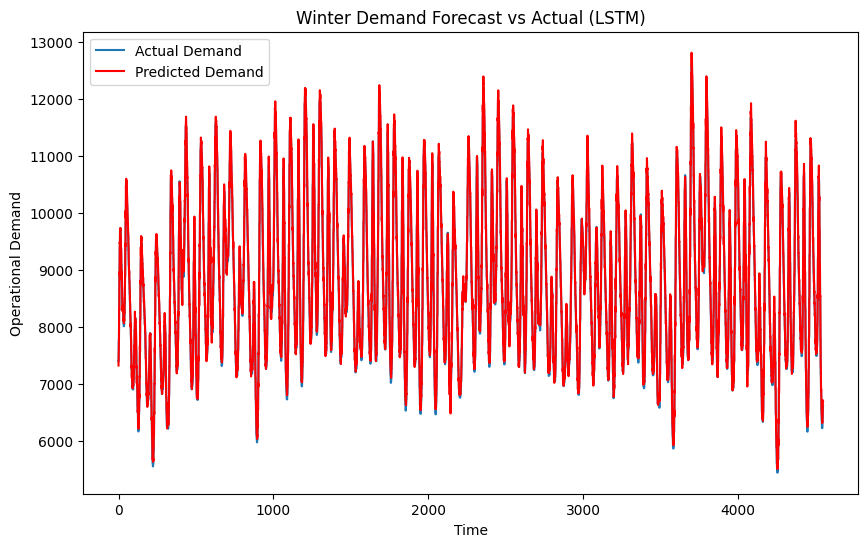

Training LSTM model for Spring...
Epoch 1/50


/opt/anaconda3/envs/ml-env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 0.0102
Epoch 2/50
435/435 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 5.6423e-04
Epoch 3/50
435/435 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 3.3554e-04
Epoch 4/50
435/435 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 2.7784e-04
Epoch 5/50
435/435 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 2.5611e-04
Epoch 6/50
435/435 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 2.3688e-04
Epoch 7/50
435/435 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 2.2271e-04
Epoch 8/50
435/435 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 2.0577e-04
Epoch 9/50
435/435 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 2.1694e-04
Epoch 10/50
435/435 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 2.1376e-04
Epoch 11/50
435/435 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 2.0131e-04
Epoch 12/50
435/435 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 2.0095e-04
Epoch 13/50
435/435 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 1.5922e-04
Epoch 14/50
435/435 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 

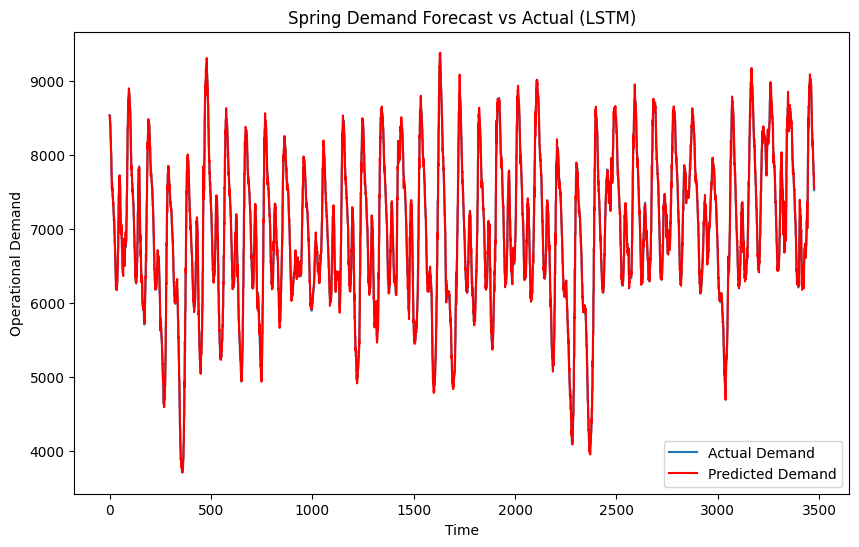

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from math import sqrt

# Step 1: Load the dataset
data = pd.read_csv('NSW/nsw_merged_all.csv')

# Convert 'date_time' to datetime format
data['date_time'] = pd.to_datetime(data['date_time'])

# Step 2: Define seasons (based on month)
def assign_season(month):
    if month in [12, 1, 2]:  # Summer
        return 'Summer'
    elif month in [3, 4, 5]:  # Autumn
        return 'Autumn'
    elif month in [6, 7, 8]:  # Winter
        return 'Winter'
    else:  # Spring
        return 'Spring'

data['season'] = data['date_time'].dt.month.apply(assign_season)

# Step 3: Define a function to create the dataset for each season
def create_lstm_model_for_season(season_data, look_back=10):
    # Select relevant columns for training
    features = ['OPERATIONAL_DEMAND', 'POWER', 'RRP']
    season_data = season_data[features].fillna(0)  # Fill NaNs with 0 if needed

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(season_data)

    # Create time-series sequences
    def create_dataset(dataset, look_back=look_back):
        X, y = [], []
        for i in range(len(dataset) - look_back):
            X.append(dataset[i:(i + look_back), :])  # Use all features for X
            y.append(dataset[i + look_back, 0])  # Predict 'OPERATIONAL_DEMAND'
        return np.array(X), np.array(y)

    X, y = create_dataset(scaled_data, look_back)

    # Split into training and testing sets (80% train, 20% test)
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dense(units=25))
    model.add(Dense(units=1))  # Output layer for demand prediction

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, batch_size=32, epochs=50)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Inverse transform the predictions back to original values
    predictions = scaler.inverse_transform(np.concatenate([predictions, np.zeros((predictions.shape[0], 2))], axis=1))[:,0]
    y_test_actual = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 2))], axis=1))[:,0]

    # Calculate RMSE
    rmse = sqrt(mean_squared_error(y_test_actual, predictions))
    print(f'{season} RMSE: {rmse}')

    # Plot the predictions vs actual values
    plt.figure(figsize=(10,6))
    plt.plot(y_test_actual, label='Actual Demand')
    plt.plot(predictions, label='Predicted Demand', color='red')
    plt.title(f'{season} Demand Forecast vs Actual (LSTM)')
    plt.xlabel('Time')
    plt.ylabel('Operational Demand')
    plt.legend()
    plt.show()

# Step 4: Filter the data for each season and train separate models
seasons = ['Summer', 'Autumn', 'Winter', 'Spring']
for season in seasons:
    print(f"Training LSTM model for {season}...")
    season_data = data[data['season'] == season]
    create_lstm_model_for_season(season_data, look_back=60)
